In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from scipy import stats
import pandas as pd


In [2]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


<AxesSubplot:xlabel='day', ylabel='tip'>

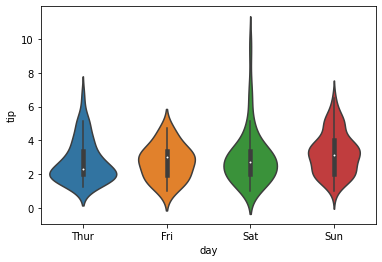

In [3]:
sns.violinplot(x='day',y='tip', data=tips)

In [4]:
y = tips['tip'].values
idx = pd.Categorical(tips['day']).codes

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
set(idx)

{0, 1, 2, 3}

In [7]:
with pm.Model() as comparing_groups:
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))

    y = pm.Normal('y', mu=means[idx], sd =sds[idx], observed=y)
    trace_cg =pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sds, means]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:08<00:00, 2552.67draws/s]


/home/ma/.bin/anaconda3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/ma/.bin/anaconda3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/ma/.bin/anaconda3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/ma/.bin/anaconda3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/ma/.bin/anaconda3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Arg

array([[<AxesSubplot:title={'center':'means'}>,
        <AxesSubplot:title={'center':'means'}>],
       [<AxesSubplot:title={'center':'sds'}>,
        <AxesSubplot:title={'center':'sds'}>]], dtype=object)

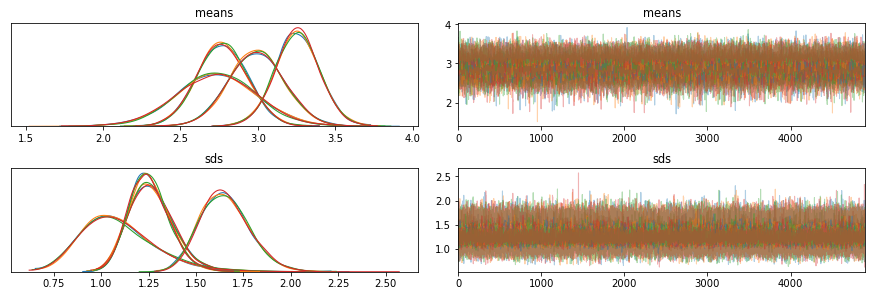

In [8]:
chain_cg = trace_cg[100::]
pm.traceplot(chain_cg)

In [9]:
pm.summary(chain_cg)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
means[0],2.771,0.161,2.469,3.076,0.001,0.001,23622.0,23622.0,23678.0,15359.0,1.0
means[1],2.736,0.257,2.256,3.222,0.002,0.001,20512.0,20368.0,20767.0,14203.0,1.0
means[2],2.992,0.178,2.666,3.331,0.001,0.001,22583.0,22476.0,22598.0,14906.0,1.0
means[3],3.255,0.143,2.984,3.525,0.001,0.001,24896.0,24879.0,25012.0,15769.0,1.0
sds[0],1.266,0.117,1.057,1.490,0.001,0.001,24054.0,23098.0,25232.0,16053.0,1.0
sds[1],1.096,0.197,0.757,1.462,0.002,0.001,17299.0,15470.0,20183.0,12499.0,1.0
sds[2],1.653,0.128,1.420,1.895,0.001,0.001,22644.0,22119.0,23171.0,14623.0,1.0
sds[3],1.254,0.105,1.061,1.450,0.001,0.000,23732.0,22842.0,24853.0,14802.0,1.0


In [17]:
comparisons = [(i,j) for i in range(4) for j in range(i+4,4)]


In [12]:
chain_cg['means'].plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'